# Data Undestanding

The data was scrapted from Webseite Stepstone. The dataset consitis of 12 columns. All raws consist text information with two exceptions an id column and time column. The data is saved in json format. As a result the fist step after data loadaing will be transofm json dictionary arrays into dataframe.

In [1]:
import json


In [2]:
import matplotlib.pyplot as plt
#import seaborn as sns
# Assess sentiment classification models 
#from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Importing standard packages. 
import importlib
import numpy as np
import pandas as pd

# Library re provides regular expressions functionality
import re

# To keep an eye on runtimes
import time

# Saving and loaded objects
import pickle

# Library beatifulsoup4 handles html
from bs4 import BeautifulSoup

# Standard NLP workflow
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import sent_tokenize

In [4]:
data = []
with open('../data/jobs.json', encoding='utf-8') as file:
    data = json.load(file)

In [26]:
data[0]['title']

'Mitarbeiter Logistik / Disponent (m/w/d)'

In [27]:
data[0]

{'id': '7098097',
 'time': '2021-05-16 21:03:55',
 'title': 'Mitarbeiter Logistik / Disponent (m/w/d)',
 'company': 'Vp GmbH',
 'location': 'Frankfurt am Main',
 'contract_type': 'Feste Anstellung',
 'work_type': 'Vollzeit',
 'introduction': '<p>Die Vp GmbH ist eine Tochter der Vp Gruppe und betreibt in Österreich und Deutschland zwei zentral geführte Divisionen - TPA Mobile Straßen &amp; Groundforce. Vp TPA Mobile Straßen entwickelt sich europaweit zu einem der größten und erfolgreichsten Dienstleister in der Vermietung mobiler Bodenschutzsysteme und Zufahrtslösungen. Mit dem Support der internationalen Vp Gruppe, einem branchenführenden\xa0Vermietkonzern mit ca. 3500 Mitarbeitern, befindet sich TPA kontinuierlich auf Expansionskurs. Schwimm auf unserer Erfolgswelle mit und lass uns mit TPA gemeinsam weiterwachsen.\xa0</p>',
 'job_description': '<div class="at-section-text-description-content sc-iELTvK kKxAdW"><ul>\n<li>Die Disposition unserer eigenen Fahrzeuge stellt Deinen Kernaufga

In [28]:
data[1]

{'id': '7026114',
 'time': '2021-05-16 21:03:55',
 'title': 'Senior Consultant (m/w/d) - Data Analytics & Business Insights',
 'company': 'Deloitte',
 'location': 'München, Düsseldorf, Frankfurt',
 'contract_type': 'Feste Anstellung',
 'work_type': 'Vollzeit',
 'introduction': '<p> Making an impact that matters. Unser Anspruch ist, jeden Tag das zu tun, was wirklich zählt. Mit unserem breiten Leistungsspektrum – von Audit &amp; Assurance, Risk Advisory über Tax &amp; Legal bis Financial Advisory und Consulting – unterstützen wir Kunden auf einzigartige Weise. Wir setzen neue Maßstäbe, liefern innovative Denkansätze und ermöglichen nachhaltiges Wachstum. Wir fördern unsere hochqualifizierten Mitarbeiter mit ihren verschiedensten Talenten, sodass sie mit uns mehr erreichen. </p>',
 'job_description': '<div class="at-section-text-description-content sc-iELTvK bAqpAg"><p> </p> \n<ul> \n<li> Es erwarten Sie Projekte, in denen wir unter Einsatz von Data Analytics unsere Kunden bei wichtigen 

In [5]:
df = pd.DataFrame(data) #transforming json dictionary arrays into DataFrame

In [32]:
df.head()

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts
0,7098097,2021-05-16 21:03:55,Mitarbeiter Logistik / Disponent (m/w/d),Vp GmbH,Frankfurt am Main,Feste Anstellung,Vollzeit,<p>Die Vp GmbH ist eine Tochter der Vp Gruppe ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."
1,7026114,2021-05-16 21:03:55,Senior Consultant (m/w/d) - Data Analytics & B...,Deloitte,"München, Düsseldorf, Frankfurt",Feste Anstellung,Vollzeit,<p> Making an impact that matters. Unser Anspr...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."
2,7201667,2021-05-16 21:03:55,Leitung Qualitätssicherung und -management (m/...,wageswiese GmbH,Freiburg im Breisgau,Feste Anstellung,Vollzeit,<p>Emils Bio-Manufaktur konzipiert und produzi...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."
3,7056404,2021-05-16 22:03:55,Inside Sales Manager B2B (m/w/d) (30-40h/Woche),Gruber-Folien GmbH & Co. KG,Straubing bei Regensburg,Feste Anstellung,"Vollzeit, Teilzeit",<p>Wir zählen seit über 45 Jahren zu den kompe...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."
4,7111892,2021-05-16 20:03:55,Bauleiter für Montagebaustellen im Hochbau (m/...,thomas gruppe,Brandenburg und angrenzende Bundesländer,Feste Anstellung,Vollzeit,<p>Die thomas gruppe ist ein familiengeführtes...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."


The next step is examing the data quality and namly the amount of not available data/missing data in the dataset. And to be sure that the scraping was done correctlly I check also if  dunplicates exist based on the unique id.  

In [36]:
#NAs 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
introduction,148,0.120816
we_offer,115,0.093878
contacts,60,0.048980
profile,30,0.024490
job_description,15,0.012245
work_type,12,0.009796
contract_type,12,0.009796
location,0,0.000000
company,0,0.000000
title,0,0.000000


In [38]:
df[df.duplicated(['id'], keep=False)] #check in if there are any duplicates

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts


As we can see there are no duplicates and generally speaking the amount of missing values is not very big. The largest amount of NAs present in the "introduction" column. As a rule in this section companies describe themselves. In the solumn we_offer companies decribe the benefits that candidat can have if gets this job. I made the decision to fill NAs with empty strings.

In [6]:
#The amount of NAs is very small. Text featurures consist NAs, as a result I ldecided to leav them 
df["introduction"].fillna("", inplace = True)
df["we_offer"].fillna("", inplace = True)
df["contacts"].fillna("", inplace = True)
df["profile"].fillna("", inplace = True)
df["job_description"].fillna("", inplace = True)
df["work_type"].fillna("", inplace = True)
df["contract_type"].fillna("", inplace = True)

In [40]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
contacts,0,0.0
we_offer,0,0.0
profile,0,0.0
job_description,0,0.0
introduction,0,0.0
work_type,0,0.0
contract_type,0,0.0
location,0,0.0
company,0,0.0
title,0,0.0


Graffic visualisation

Text(0.5, 1.0, 'Location')

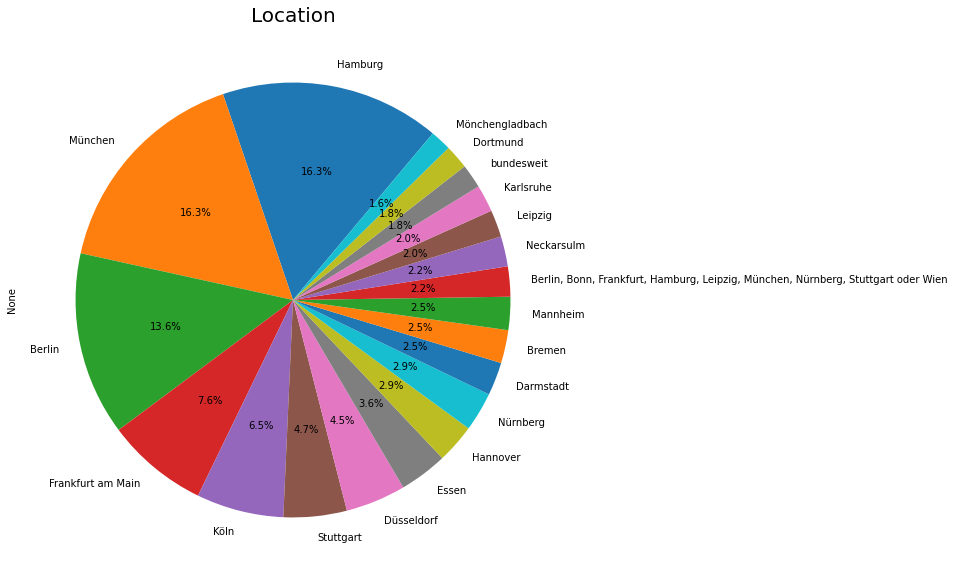

In [38]:
df.location.apply(pd.Series).stack().str.strip().value_counts()[:20].plot.pie(figsize=(12,10), startangle=50, autopct='%1.1f%%', fontsize=10)
plt.title("Location",fontsize=20)

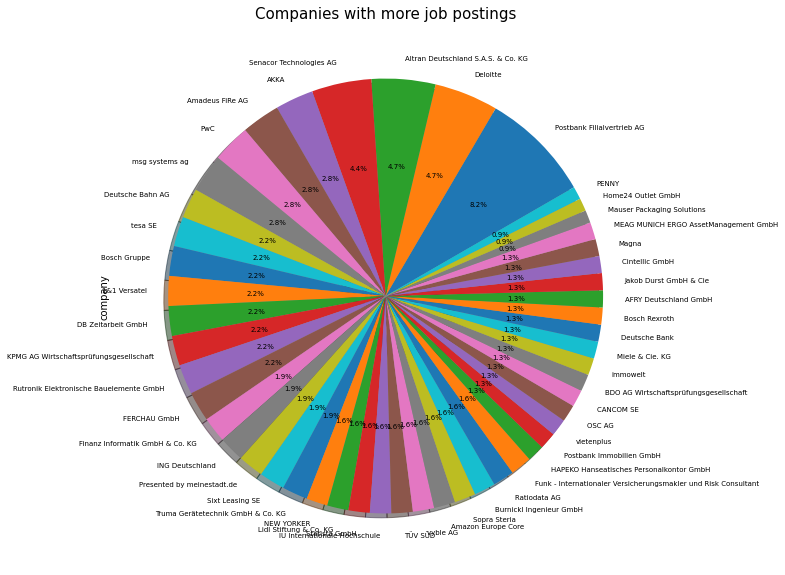

In [36]:
df["company"].value_counts()[:50].plot.pie(figsize=(12,10), shadow=True, startangle=30, autopct='%1.1f%%', fontsize=7)
plt.title("Companies with more job postings", fontsize=15)
plt.show()

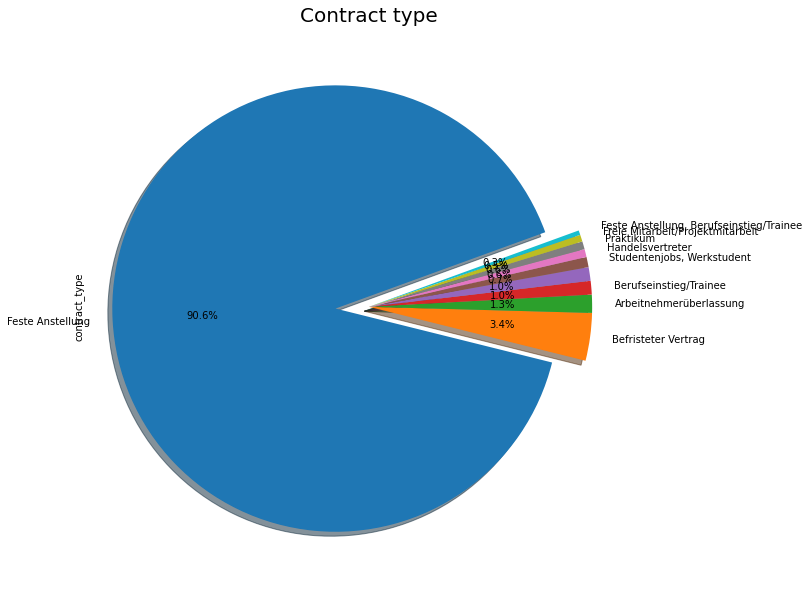

In [35]:
explodeTuple = (0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
df["contract_type"].value_counts()[:10].plot.pie(figsize=(10,15), shadow=True, startangle=20, autopct='%1.1f%%', explode=explodeTuple, fontsize=10)
plt.title("Contract type", fontsize=20)
plt.show()

### Data cleaning

In [40]:
df.introduction.head()

0    <p>Die Vp GmbH ist eine Tochter der Vp Gruppe ...
1    <p> Making an impact that matters. Unser Anspr...
2    <p>Emils Bio-Manufaktur konzipiert und produzi...
3    <p>Wir zählen seit über 45 Jahren zu den kompe...
4    <p>Die thomas gruppe ist ein familiengeführtes...
Name: introduction, dtype: object

In [9]:
df.head(2)

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts
0,7098097,2021-05-16 21:03:55,Mitarbeiter Logistik / Disponent (m/w/d),Vp GmbH,Frankfurt am Main,Feste Anstellung,Vollzeit,<p>Die Vp GmbH ist eine Tochter der Vp Gruppe ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."
1,7026114,2021-05-16 21:03:55,Senior Consultant (m/w/d) - Data Analytics & B...,Deloitte,"München, Düsseldorf, Frankfurt",Feste Anstellung,Vollzeit,<p> Making an impact that matters. Unser Anspr...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...","<div class=""at-section-text-contact-content sc..."


In [10]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [15]:
df['clean_introduction'] = df['introduction'].apply(cleanhtml)
df['clean_job_description'] = df['job_description'].apply(cleanhtml)
df['clean_profile'] = df['profile'].apply(cleanhtml)
df['clean_we_offer'] = df['we_offer'].apply(cleanhtml)
df['clean_contacts'] = df['contacts'].apply(cleanhtml)

In [45]:
df.cleanintroduction.head()

0    Die Vp GmbH ist eine Tochter der Vp Gruppe und...
1     Making an impact that matters. Unser Anspruch...
2    Emils Bio-Manufaktur konzipiert und produziert...
3    Wir zählen seit über 45 Jahren zu den kompeten...
4    Die thomas gruppe ist ein familiengeführtes Un...
Name: cleanintroduction, dtype: object

In [48]:
df.title.head(40)

0              Mitarbeiter Logistik / Disponent (m/w/d)
1     Senior Consultant (m/w/d) - Data Analytics & B...
2     Leitung Qualitätssicherung und -management (m/...
3       Inside Sales Manager B2B (m/w/d) (30-40h/Woche)
4     Bauleiter für Montagebaustellen im Hochbau (m/...
5                      Vice President of Growth (m/f/d)
6     Altenpfleger / Gesundheits- und Krankenpfleger...
7                                    Volljurist (m/w/d)
8                  Business Development Manager (m/w/d)
9             Assistenz (m/w/d) für den COO Road & Rail
10                Sachbearbeiter Produktservice (w/m/d)
11                 IT Inhouse Consultant (m/w/d) SAP SD
12              Referent Finanzen international (m/w/d)
13     Software Entwickler (m/w/d) - Bildverarbeitun...
14                                  Assistenz* Vertrieb
15    Ingenieur als Projektleitung (m/w/d) Versorgun...
16    Controller (m/w/d) für den Bereich Planung- un...
17             Selbstständiger Immobilienmakler 

In [12]:
def remove_gendering(title):
  #https://persoblogger.de/2018/08/27/was-bedeutet-m-w-d-m-w-x-m-w-i-oder-m-w-a-in-stellenanzeigen-faqs-zum-dritten-geschlecht/
  cleanr = re.compile('\([mw]?/?[wm]?/?([diax*d]|gn)?\)') 
  star = re.compile('\*')
  cleantext = re.sub(cleanr, '', title) 
  cleantext = re.sub(star, '', cleantext)
  return cleantext
  

In [52]:
print(remove_gendering(df.title[0]))

Mitarbeiter Logistik / Disponent 


In [58]:
print(remove_gendering(df.title[34]))

Werkstudent (gn) Online Marketing


In [60]:
print(remove_gendering('Geschäftserin* (m/w/d)'))

Geschäftserin 


In [13]:
df['cleantitle'] = df['title'].apply(remove_gendering)

In [65]:
df.cleantitle.head(40)

0                     Mitarbeiter Logistik / Disponent 
1     Senior Consultant  - Data Analytics & Business...
2     Leitung Qualitätssicherung und -management  Fe...
3              Inside Sales Manager B2B  (30-40h/Woche)
4           Bauleiter für Montagebaustellen im Hochbau 
5                      Vice President of Growth (m/f/d)
6     Altenpfleger / Gesundheits- und Krankenpfleger...
7                                           Volljurist 
8                         Business Development Manager 
9                    Assistenz  für den COO Road & Rail
10                       Sachbearbeiter Produktservice 
11                        IT Inhouse Consultant  SAP SD
12                     Referent Finanzen international 
13     Software Entwickler  - Bildverarbeitung / Mac...
14                                   Assistenz Vertrieb
15     Ingenieur als Projektleitung  Versorgungstechnik
16    Controller  für den Bereich Planung- und Proje...
17                    Selbstständiger Immobilien

,id,time,title,company,location,contract_type,work_type,introduction,job_description,profile,we_offer,contacts,clean_introduction,clean_job_description,clean_profile,clean_we_offer,cleantitle
0,7098097,2021-05-16 21:03:55,Mitarbeiter Logistik / Disponent (m/w/d),Vp GmbH,Frankfurt am Main,Feste Anstellung,Vollzeit,<p>Die Vp GmbH ist eine Tochter der Vp Gruppe ...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",Haben wir Dein Interesse geweckt? Dann freuen ...,Die Vp GmbH ist eine Tochter der Vp Gruppe und...,\nDie Disposition unserer eigenen Fahrzeuge st...,\nDu verfügst über eine abgeschlossene kaufmän...,\nEine herausfordernde und abwechslungsreiche ...,Mitarbeiter Logistik / Disponent
1,7026114,2021-05-16 21:03:55,Senior Consultant (m/w/d) - Data Analytics & B...,Deloitte,"München, Düsseldorf, Frankfurt",Feste Anstellung,Vollzeit,<p> Making an impact that matters. Unser Anspr...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",\n Bitte richten Sie Ihre Bewerbung an das D...,Making an impact that matters. Unser Anspruch...,"\n \n Es erwarten Sie Projekte, in denen wir...",\n \n Ihre Studienschwerpunkte in Wirtschaft...,"\n Neben einer angenehmen, kollegialen Atmos...",Senior Consultant - Data Analytics & Business...
2,7201667,2021-05-16 21:03:55,Leitung Qualitätssicherung und -management (m/...,wageswiese GmbH,Freiburg im Breisgau,Feste Anstellung,Vollzeit,<p>Emils Bio-Manufaktur konzipiert und produzi...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",Emils Bio-Manufaktur / wageswiese GmbH\nMichae...,Emils Bio-Manufaktur konzipiert und produziert...,In unserer IFS-GMF zertifizierten Manufaktur b...,Ob Lebensmittel-Techniker*in oder studierte*r ...,Wir sind ein dynamisches und stetig wachsendes...,Leitung Qualitätssicherung und -management Fe...
3,7056404,2021-05-16 22:03:55,Inside Sales Manager B2B (m/w/d) (30-40h/Woche),Gruber-Folien GmbH & Co. KG,Straubing bei Regensburg,Feste Anstellung,"Vollzeit, Teilzeit",<p>Wir zählen seit über 45 Jahren zu den kompe...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",Bitte senden Sie uns Ihre vollständigen Unterl...,Wir zählen seit über 45 Jahren zu den kompeten...,\nAufbau von langfristigen Partnerschaften dur...,\nSie verkaufen gerne und sind dabei hochmotiv...,\nUnbefristeter Arbeitsvertrag mit transparent...,Inside Sales Manager B2B (30-40h/Woche)
4,7111892,2021-05-16 20:03:55,Bauleiter für Montagebaustellen im Hochbau (m/...,thomas gruppe,Brandenburg und angrenzende Bundesländer,Feste Anstellung,Vollzeit,<p>Die thomas gruppe ist ein familiengeführtes...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",Sie sind auf der Suche nach einer abwechslungs...,Die thomas gruppe ist ein familiengeführtes Un...,\nSie behalten den Überblick über Ihre Bauvorh...,\nSie sind Baufacharbeiter/in mit Meistertitel...,"\nEine wertebasierte Unternehmensführung, lang...",Bauleiter für Montagebaustellen im Hochbau
5,7098115,2021-05-16 22:03:55,Vice President of Growth (m/f/d),LOVOO GmbH,Dresden,Feste Anstellung,Vollzeit,<p>Getting to know people in an entertaining w...,"<div class=""at-section-text-description-conten...","<div class=""at-section-text-profile-content sc...","<div class=""at-section-text-weoffer-content sc...",LOVOO GmbH \n \nMia Voigt\nPrager Straße 10\n0...,Getting to know people in an entertaining way ...,\nKey responsibility for establishing the defi...,\nAt least eight years of professional experie...,\nDevelopment and significant involvement